<a href="https://colab.research.google.com/github/ehsankarami1358/git_Logistic_regression/blob/main/Session06_Workshop2_LogReg01_iphone_purchase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Logistic Regression (iphone_purchase)
In statistics, the logistic model is used to model the probability of a certain class or event existing such as pass/fail, win/lose, alive/dead or healthy/sick.

 This can be extended to model several classes of events such as determining whether an image contains a cat, dog, lion, etc.

 [Wiki](https://en.wikipedia.org/wiki/Logistic_regression)

In [36]:
#imports
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [26]:
# Step 1 - Load Data
dataset = pd.read_csv("iphone_purchase_records.csv")
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:, 3].values

In [27]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           400 non-null    object
 1   Age              400 non-null    int64 
 2   Salary           400 non-null    int64 
 3   Purchase Iphone  400 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 12.6+ KB


In [28]:
# Step 2 - Convert Gender to number
labelEncoder_gender =  LabelEncoder() #from sklearn
X[:,0] = labelEncoder_gender.fit_transform(X[:,0])

In [29]:
# Optional - if you want to convert X to float data type
X = X.astype(float)

In [30]:
# Step 3 - Split Data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [31]:
# Step 4 - Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [32]:
# Step 5 - Logistic Regression Classifier
classifier = LogisticRegression(random_state=0, solver="liblinear")
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [33]:
# Step 6 - Predict
y_pred = classifier.predict(X_test)

[[65  3]
 [ 6 26]]
Accuracy score: 0.91
Precision score: 0.896551724137931
Recall score: 0.8125


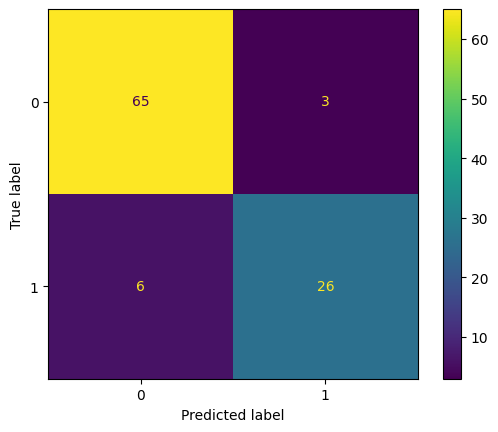

In [37]:
# Step 7 - Confusion Matrix
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy score:",accuracy)
precision = metrics.precision_score(y_test, y_pred)
print("Precision score:",precision)
recall = metrics.recall_score(y_test, y_pred)
print("Recall score:",recall)
disp = ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test)
plt.show()

In [38]:
# Step 8 - Make New Predictions
x1 = sc.transform([[1,21,40000]])
x2 = sc.transform([[1,21,80000]])
x3 = sc.transform([[0,21,40000]])
x4 = sc.transform([[0,21,80000]])
x5 = sc.transform([[1,41,40000]])
x6 = sc.transform([[1,41,80000]])
x7 = sc.transform([[0,41,40000]])
x8 = sc.transform([[0,68,80000]])
print("Male aged 21 making $40k will buy iPhone:", classifier.predict(x1))
print("Male aged 21 making $80k will buy iPhone:", classifier.predict(x2))
print("Female aged 21 making $40k will buy iPhone:", classifier.predict(x3))
print("Female aged 21 making $80k will buy iPhone:", classifier.predict(x4))
print("Male aged 41 making $40k will buy iPhone:", classifier.predict(x5))
print("Male aged 41 making $80k will buy iPhone:", classifier.predict(x6))
print("Female aged 41 making $40k will buy iPhone:", classifier.predict(x7))
print("Female aged 68 making $80k will buy iPhone:", classifier.predict(x8))

Male aged 21 making $40k will buy iPhone: [0]
Male aged 21 making $80k will buy iPhone: [0]
Female aged 21 making $40k will buy iPhone: [0]
Female aged 21 making $80k will buy iPhone: [0]
Male aged 41 making $40k will buy iPhone: [0]
Male aged 41 making $80k will buy iPhone: [1]
Female aged 41 making $40k will buy iPhone: [0]
Female aged 68 making $80k will buy iPhone: [1]
